Computes Buffet Indicator
====

In [166]:
%matplotlib inline

Fetches API key stored in 'apikey' file

In [167]:
with open('apikey') as fp:
    APIKEY = fp.read()

In [168]:
import requests
import matplotlib.pyplot as plt
import json
import numpy as np

Get the Real GDP parent NIPA table via the BEA API

In [169]:

TABLE = "T10105" # US GDP NIPA Table
LINE = 1 # NIPA Table Line (1 for GDP)
URL = f"https://apps.bea.gov/api/data/?&UserID={APIKEY}&method=GetData&DataSetName=NIPA\
&TableName={TABLE}&LineNumber={LINE}&Frequency=Q&Year=ALL&ResultFormat=JSON"


Convert the data to json, only select the relevant line and for the desired quarters

In [170]:
N_QUARTERS = 150

res = json.loads(requests.get(URL).text)
data = [dpt for dpt in res['BEAAPI']['Results']['Data'] if dpt['LineNumber'] == "1"]
focusdata = data[-N_QUARTERS:]

Plot the real GDP

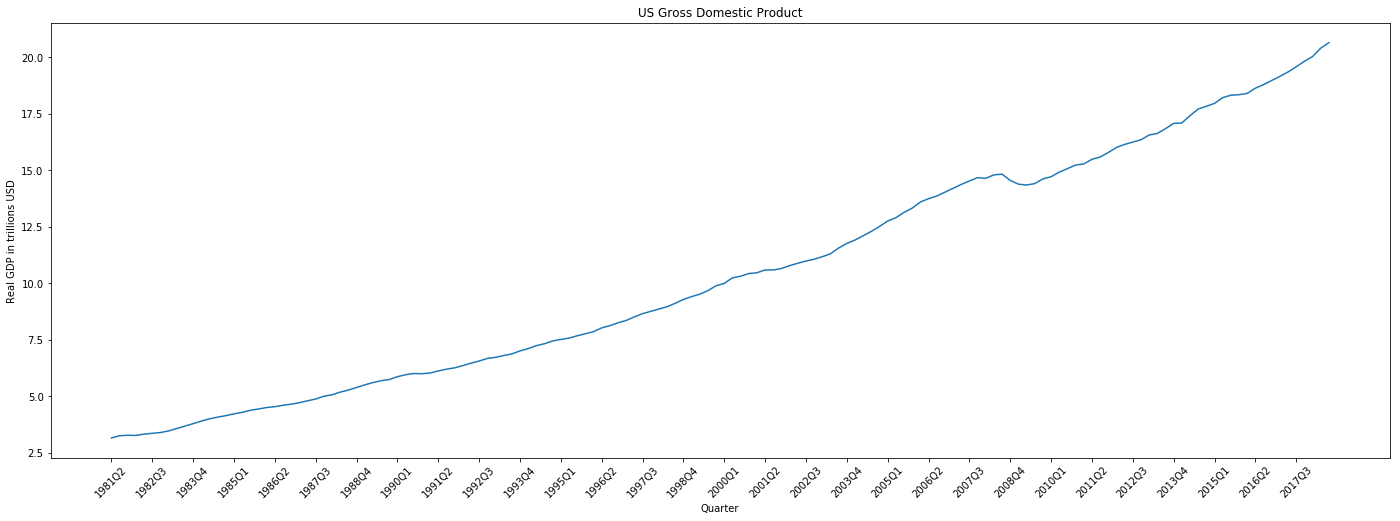

In [171]:
PLOT_XLABEL_STEP = 5 # Show 1 label every n quarters
PLOT_XLABEL_ROT = 45
PLOT_SIZE = (24, 8)

fd_t = [fdpt['TimePeriod'] for fdpt in focusdata]
fd_dv = [int(fdpt['DataValue'].replace(',','')) / 1e6 for fdpt in focusdata]
plt.figure(figsize=PLOT_SIZE)
plt.plot(fd_t, fd_dv)
plt.xticks(rotation=PLOT_XLABEL_ROT)
plt.title('US Gross Domestic Product')
plt.xlabel('Quarter')
plt.ylabel('Real GDP in trillions USD')
ax = plt.gca()
ax.set_xticks([x for i, x in enumerate(ax.get_xticks()) if not i%PLOT_XLABEL_STEP])
plt.show()